In [51]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
df = pd.read_csv('ThoraricSurgery.arff',header=19)
df_c = df
print(len(df_c[df_c['Risk1Yr']=='T']))
df_c = shuffle(df_c)
print(df.head(3))
print(df.shape)

data_rows = df_c.shape[0]
training_rows = round(data_rows*0.75)  # this is where the 75/25 split is identified
test_rows = data_rows-training_rows
print('\nThe data set has',data_rows,'rows.')
print('The training set has',training_rows,'rows.')
print('The test set has',test_rows,'rows.')

df_c['DGN']     = df_c['DGN'].map({'DGN3':3,'DGN2':2,'DGN4':4,'DGN6':6,'DGN5':5,'DGN8':8,'DGN1':1})
df_DGN_train    = df_c['DGN'][:training_rows]
df_DGN_test     = df_c['DGN'][training_rows:]

df_c['PRE6']    = df_c['PRE6'].map({'PRZ2':2,'PRZ1':1,'PRZ0':0})
df_PRE6_train   = df_c['PRE6'][:training_rows]
df_PRE6_test    = df_c['PRE6'][training_rows:]

df_c['PRE7']    = df_c['PRE7'].map({'T':1,'F':0})
df_PRE7_train   = df_c['PRE7'][:training_rows]
df_PRE7_test    = df_c['PRE7'][training_rows:]

df_c['PRE8']    = df_c['PRE8'].map({'T':1,'F':0})
df_PRE8_train   = df_c['PRE8'][:training_rows]
df_PRE8_test    = df_c['PRE8'][training_rows:]

df_c['PRE9']    = df_c['PRE9'].map({'T':1,'F':0})
df_PRE9_train   = df_c['PRE9'][:training_rows]
df_PRE9_test    = df_c['PRE9'][training_rows:]

df_c['PRE10']   = df_c['PRE10'].map({'T':1,'F':0})
df_PRE10_train  = df_c['PRE10'][:training_rows]
df_PRE10_test   = df_c['PRE10'][training_rows:]

df_c['PRE11']   = df_c['PRE11'].map({'T':1,'F':0})
df_PRE11_train  = df_c['PRE11'][:training_rows]
df_PRE11_test   = df_c['PRE11'][training_rows:]

df_c['PRE14']   = df_c['PRE14'].map({'OC11':11,'OC14':14,'OC12':12,'OC13':13})
df_PRE14_train  = df_c['PRE14'][:training_rows]
df_PRE14_test   = df_c['PRE14'][training_rows:]

df_c['PRE17']   = df_c['PRE17'].map({'T':1,'F':0})
df_PRE17_train  = df_c['PRE17'][:training_rows]
df_PRE17_test   = df_c['PRE17'][training_rows:]

df_c['PRE19']   = df_c['PRE19'].map({'T':1,'F':0})
df_PRE19_train  = df_c['PRE19'][:training_rows]
df_PRE19_test  = df_c['PRE19'][training_rows:]

df_c['PRE25']   = df_c['PRE25'].map({'T':1,'F':0})
df_PRE25_train  = df_c['PRE25'][:training_rows]
df_PRE25_test   = df_c['PRE25'][training_rows:]

df_c['PRE30']   = df_c['PRE30'].map({'T':1,'F':0})
df_PRE30_train  = df_c['PRE30'][:training_rows]
df_PRE30_test  = df_c['PRE30'][training_rows:]

df_c['PRE32']   = df_c['PRE32'].map({'T':1,'F':0})
df_PRE32_train  = df_c['PRE32'][:training_rows]
df_PRE32_test   = df_c['PRE32'][training_rows:]

df_c['Risk1Yr'] = df_c['Risk1Yr'].map({'T':1,'F':0})
df_Risk1Yr_train= df_c['Risk1Yr'][:training_rows]
df_Risk1Yr_test = df_c['Risk1Yr'][training_rows:]

df_PRE4_train   = df_c['PRE4'][:training_rows]
df_PRE4_test    = df_c['PRE4'][training_rows:]
df_PRE5_train   = df_c['PRE5'][:training_rows]
df_PRE5_test    = df_c['PRE5'][training_rows:]
df_Age_train    = df_c['AGE'][:training_rows]
df_Age_test     = df_c['AGE'][training_rows:]

print(df.head(3))
print('\n')

df_cols = list(df.columns)
df_Xcols = df_cols[0:len(df_cols)-1]


#df_Xcols.pop(1)
#df_Xcols.pop(1)

df_Ycols = df_cols[len(df_cols)-1]
print(df_Xcols)
print(df_Ycols)


70
    DGN  PRE4  PRE5  PRE6 PRE7 PRE8 PRE9 PRE10 PRE11 PRE14 PRE17 PRE19 PRE25  \
0  DGN2  2.88  2.16  PRZ1    F    F    F     T     T  OC14     F     F     F   
1  DGN3  3.40  1.88  PRZ0    F    F    F     F     F  OC12     F     F     F   
2  DGN3  2.76  2.08  PRZ1    F    F    F     T     F  OC11     F     F     F   

  PRE30 PRE32  AGE Risk1Yr  
0     T     F   60       F  
1     T     F   51       F  
2     T     F   59       F  
(470, 17)

The data set has 470 rows.
The training set has 352 rows.
The test set has 118 rows.
    DGN  PRE4  PRE5  PRE6 PRE7 PRE8 PRE9 PRE10 PRE11 PRE14 PRE17 PRE19 PRE25  \
0  DGN2  2.88  2.16  PRZ1    F    F    F     T     T  OC14     F     F     F   
1  DGN3  3.40  1.88  PRZ0    F    F    F     F     F  OC12     F     F     F   
2  DGN3  2.76  2.08  PRZ1    F    F    F     T     F  OC11     F     F     F   

  PRE30 PRE32  AGE Risk1Yr  
0     T     F   60       F  
1     T     F   51       F  
2     T     F   59       F  


['DGN', 'PRE4', 'PRE5', '

In [53]:

final_train = pd.concat([df_Risk1Yr_train,df_DGN_train,df_PRE4_train,df_PRE5_train,df_PRE6_train,df_PRE7_train,df_PRE8_train,df_PRE9_train,df_PRE10_train,df_PRE11_train,df_PRE14_train,df_PRE17_train,df_PRE19_train,df_PRE25_train,df_PRE30_train,df_PRE32_train,df_Age_train],axis=1)
final_test  = pd.concat([df_Risk1Yr_test,df_DGN_test,df_PRE4_test,df_PRE5_test,df_PRE6_test,df_PRE7_test,df_PRE8_test,df_PRE9_test,df_PRE10_test,df_PRE11_test,df_PRE14_test,df_PRE17_test,df_PRE19_test,df_PRE25_test,df_PRE30_test,df_PRE32_test,df_Age_test],axis=1)

print(len(df_Xcols))
print(final_train.head(3))
print(final_test.head(3))

df_Xtrain = final_train[df_Xcols]
df_Ytrain = final_train[df_Ycols]

16
     Risk1Yr  DGN  PRE4  PRE5  PRE6  PRE7  PRE8  PRE9  PRE10  PRE11  PRE14  \
189        0    4  4.92  3.72     0     0     0     0      0      0     12   
400        0    3  2.48  1.60     0     0     0     0      0      0     11   
398        0    2  2.96  2.33     1     0     0     0      1      0     11   

     PRE17  PRE19  PRE25  PRE30  PRE32  AGE  
189      0      0      0      1      0   60  
400      0      0      0      0      0   61  
398      0      0      0      1      0   72  
     Risk1Yr  DGN  PRE4  PRE5  PRE6  PRE7  PRE8  PRE9  PRE10  PRE11  PRE14  \
218        0    3  4.00  3.08     1     0     0     0      1      0     11   
411        0    3  4.64  4.16     1     1     0     0      1      0     13   
324        0    4  5.16  4.96     1     0     0     0      0      0     11   

     PRE17  PRE19  PRE25  PRE30  PRE32  AGE  
218      0      0      0      1      0   71  
411      0      0      0      1      0   56  
324      0      0      0      1      0   54  


In [54]:
Statmodel = LogisticRegression()
rfe = RFE(estimator=Statmodel, n_features_to_select=17, step=1)                                                          # Run estimator for logistic regression
rfe = rfe.fit(df_Xtrain,df_Ytrain)

RFE_head = (list(df_Xtrain.columns[rfe.support_]))
print(RFE_head)

['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE']


In [55]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=Statmodel, step=1, cv=2, scoring='accuracy')                                         # Create the RFE object and compute a cross-validated score.
rfecv.fit(df_Xtrain, df_Ytrain)

print("Optimal number of features: %d" % rfecv.n_features_)                                                             #MSG number of features selected by RFECV method
print('Selected features: %s' % list(df_Xtrain.columns[rfecv.support_]))

RFECV_head = (list(df_Xtrain.columns[rfecv.support_]))

Optimal number of features: 1
Selected features: ['PRE17']


In [56]:
Chi2_test, P_val = chi2(df_Xtrain,df_Ytrain)
print(Chi2_test)
print(P_val)
Chi2_head = []
for i in range(len(P_val)):                                                                                             # select significant features from Chi2
    if P_val[i] <=0.05:

        Add_header = df_Xtrain.columns[i]                                                                                  # build Chi2 header
        Chi2_head.append(Add_header)

[5.56548005e-01 7.85059940e-02 4.56441352e+01 4.58353874e-01
 3.82103868e-01 7.31039478e-01 1.67981321e-01 8.22516200e-01
 2.91364747e+00 4.16328939e-01 2.56692118e+00 3.54515050e-01
 1.21579268e-02 2.99910132e-01 1.77257525e-01 1.51322360e-02]
[4.55654457e-01 7.79332344e-01 1.41810028e-11 4.98394299e-01
 5.36479427e-01 3.92546461e-01 6.81912138e-01 3.64445514e-01
 8.78330251e-02 5.18774539e-01 1.09119921e-01 5.51568330e-01
 9.12200808e-01 5.83938765e-01 6.73740751e-01 9.02096682e-01]


In [57]:
#  set up variables 

rfe_selections = []
rfecv_selections = []
chi2_selections = []
all_selections = []
rfe_accs = [0]
rfecv_accs = [0]
chi2_accs = [0]
all_accs = [0]
Mod_count = []
Acc_count = []

warnings.filterwarnings("ignore", category=FutureWarning)

all = df_Xcols
Accuracies_Comp =[]
AUC_comp =[]
Model_selector=[RFE_head,RFECV_head,Chi2_head,all]
Model_names = ["RFE_head","RFECV_head","Chi2_head","all"]

for i in range(len(Model_selector)):                                                                                    # interate through each model to find optimal solution

    Xtrain_t = final_train[Model_selector[i]]
    Ytrain_t = final_train[df_Ycols]
    Xtest_t = final_test[Model_selector[i]]
    Ytest_t = final_test[df_Ycols]


    logreg_t = LogisticRegression()                                                                                 # check classification scores of logistic regression
    logreg_t.fit(Xtrain_t, Ytrain_t)                                                                                # train Logistic Regression modelt
    y_prediction_t = logreg_t.predict(Xtest_t)                                                                            # test Logistio Refression model on test data
    y_prediction_prob_t = logreg_t.predict_proba(Xtest_t)[:, 1]
    [false_pos_t, true_pos_t, threshold_t] = roc_curve(Ytest_t, y_prediction_prob_t)

    Accuracy = (accuracy_score(Ytest_t, y_prediction_t))
    AreaUnderCurve = (auc(false_pos_t, true_pos_t))

    Accuracies_Comp.append(Accuracy)
    AUC_comp.append(AreaUnderCurve)

    if Model_names[i]== "RFE_head":
        rfe_selections.append(Model_names[i])
        rfe_accs.append(Accuracies_Comp[i])
    elif Model_names[i] == "RFECV_head":
        rfecv_selections.append(Model_names[i])
        rfecv_accs.append(Accuracies_Comp[i])
    elif Model_names[i] == "Chi2_head":
        chi2_selections.append(Model_names[i])
        chi2_accs.append(Accuracies_Comp[i])
    else:
        all_selections.append(Model_names[i])
        all_accs.append(Accuracies_Comp[i])

In [58]:
# this code iterates through the 4 models and determines which was the most accurate. 

counter = 1
for i in range(2,4):

    Acctest = Accuracies_Comp[counter]
    Acctest2 = Accuracies_Comp[i]
    if Acctest2 > Acctest:
        counter = i

    print("model selected", Model_names[counter])

    Mod_count.append(Model_names[counter])
    Acc_count.append(Accuracies_Comp[counter])

Model_headers = Model_selector[counter]


model selected RFECV_head
model selected RFECV_head


In [59]:
# **************************************calculate most accurate from runs
print(" ")
print(" ")
print(rfe_accs[1], " ", rfecv_accs[1], " ", chi2_accs[1], " ", all_accs[1])    # print the accuracies of the models
print(" ")
print(" ")

 
 
0.847457627118644   0.8559322033898306   0.8559322033898306   0.847457627118644
 
 


In [60]:
# *****************************************Define XY for test data************************************************

Xtrain_final = final_train[Model_headers]
Ytrain_final = final_train['Risk1Yr']
Xtest_final = final_test[Model_headers]
Ytest_final = final_test['Risk1Yr']

In [61]:
# ******************************************** test the chosen model against the test data
logreg = LogisticRegression()                                                                                           # check classification scores of logistic regression
logreg.fit(Xtrain_final, Ytrain_final)                                                                                  # train Logistic Regression modelt
y_prediction = logreg.predict(Xtest_final)                                                                              # test Logistio Regression model on test data
y_prediction_prob = logreg.predict_proba(Xtest_final)[:, 1]
[false_pos, true_pos, threshold] = roc_curve(Ytest_final, y_prediction_prob)
                                                                                                                        # MSG print results of accuracy of test v train
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Ytest_final, y_prediction))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(Ytest_final, y_prediction_prob))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(false_pos, true_pos))
print(" ")

index = np.min(np.where(true_pos > 0.6)) # index of the first threshold for which the sensitivity > 0.95                calculate optimal specificity/ index

LogisticRegression accuracy is 0.856
LogisticRegression log_loss is 0.405
LogisticRegression auc is 0.573
 


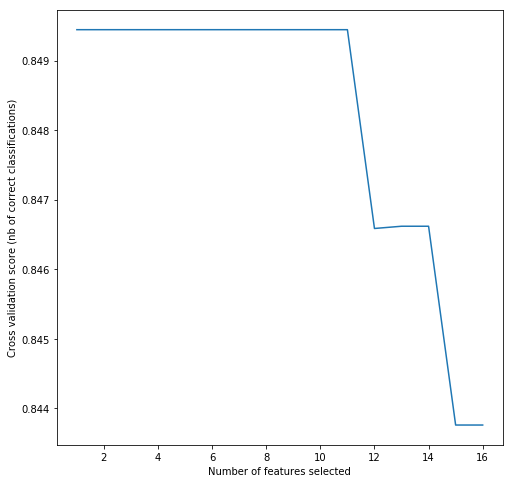

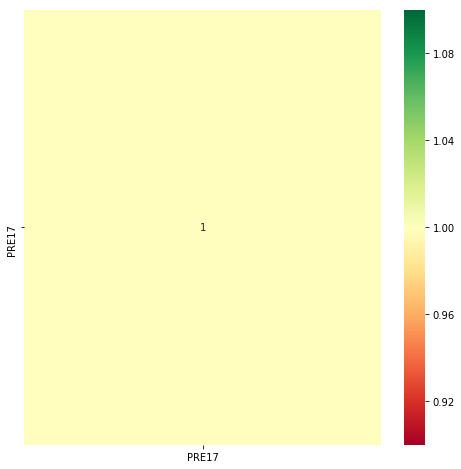

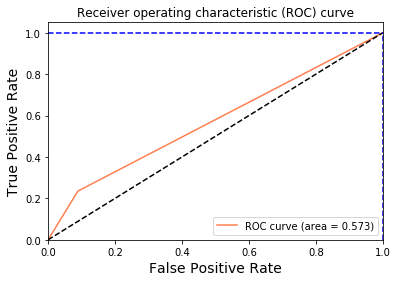

Using a threshold of 0.150 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0]
the number of significant features in the model were 1
the features used in the model were
number 1 most significant feature PRE5 P value 0.45565445714951913
 
the performance of the model on the test data is as follows:
the model gives 0 true positives
the model gives 101 true negatives
the model gives 0 type one errors
the model gives 17 type two errors
the sensitivity of the model is 

In [62]:
# *********************************************create plots*************************************************************

Models = [rfecv,rfe,Chi2_test,all]
Opt_Model = Models[counter]

plt.figure(figsize=(8,8))                                                                                               # Plot number of features VS. cross-validation scores
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Xplot = final_train[Model_headers]

plt.subplots(figsize=(8, 8))
sns.heatmap(Xplot.corr(), annot=True, cmap="RdYlGn")
plt.show()

# ***************************************************plot ROC curce*****************************************************
plt.figure()
plt.plot(false_pos, true_pos, color='coral', label='ROC curve (area = %0.3f)' % auc(false_pos, true_pos))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,false_pos[index]], [true_pos[index],true_pos[index]], 'k--', color='blue')
plt.plot([false_pos[index],false_pos[index]], [0,true_pos[index]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % threshold[index] + "guarantees a sensitivity of %.3f " % true_pos[index] +
      "and a specificity of %.3f" % (1-false_pos[index]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(false_pos[index])*100))

# ***********calculate all TruePos, TrueNeg, FalsePos, FalseNeg for Test data based on prediction **********************

TP = 0
FP = 0
TN = 0
FN = 0

Ytest_final = np.array(Ytest_final)
print(y_prediction)
print(Ytest_final)


for i in range(len(y_prediction)):
    if Ytest_final[i]==y_prediction[i]==1:
        TP += 1
    if y_prediction[i]==1 and Ytest_final[i]!=y_prediction[i]:
        FP += 1
    if Ytest_final[i]==y_prediction[i]==0:
        TN += 1
    if y_prediction[i]==0 and Ytest_final[i]!=y_prediction[i]:
        FN += 1

tot_features = (len(Chi2_head))
print("the number of significant features in the model were",tot_features)
print("the features used in the model were")


for i in range(len(Chi2_head)):

    print("number", (tot_features-i), "most significant feature", Chi2_head[i], "P value",
          P_val[i])

print(" ")
print("the performance of the model on the test data is as follows:")
print("the model gives", TP, "true positives")
print("the model gives", TN, "true negatives")
print("the model gives", FP, "type one errors")
print("the model gives", FN, "type two errors")

print("the sensitivity of the model is", TP/(len(y_prediction)))
print("the specificity of the model is", TN/(len(y_prediction)))
print("the type one error rate is", FP/(len(y_prediction)))
print("the type one error rate is", FN/(len(y_prediction)))

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


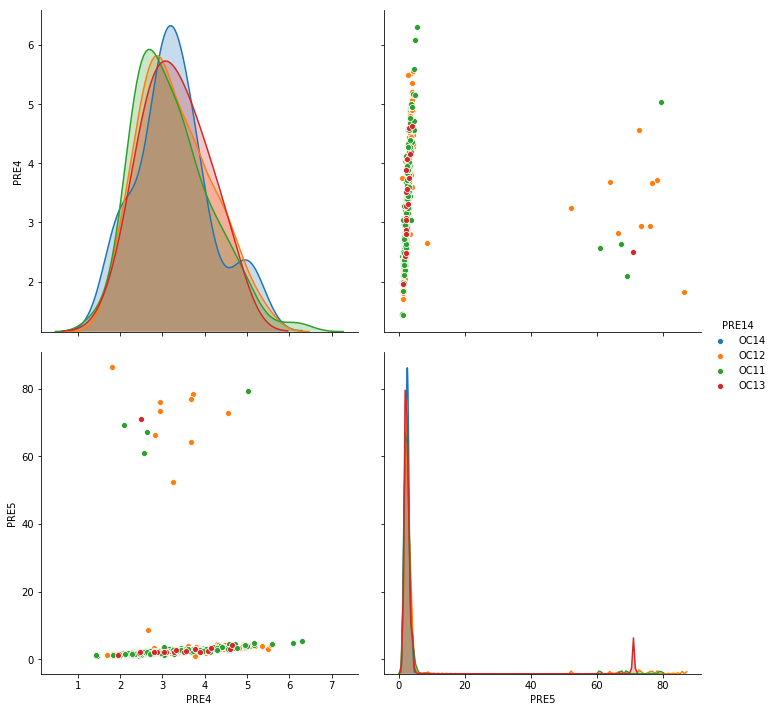

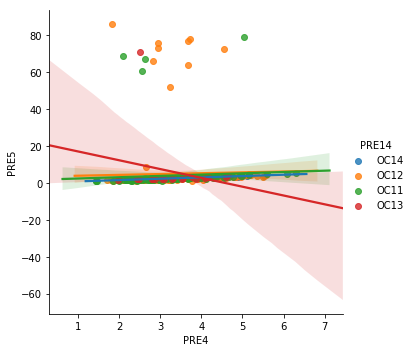

In [63]:
df_new = df[['PRE4','PRE5','PRE14']]
sns.pairplot(df_new,hue='PRE14',size=5)
sns.lmplot('PRE4','PRE5',data=df_new,hue='PRE14')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


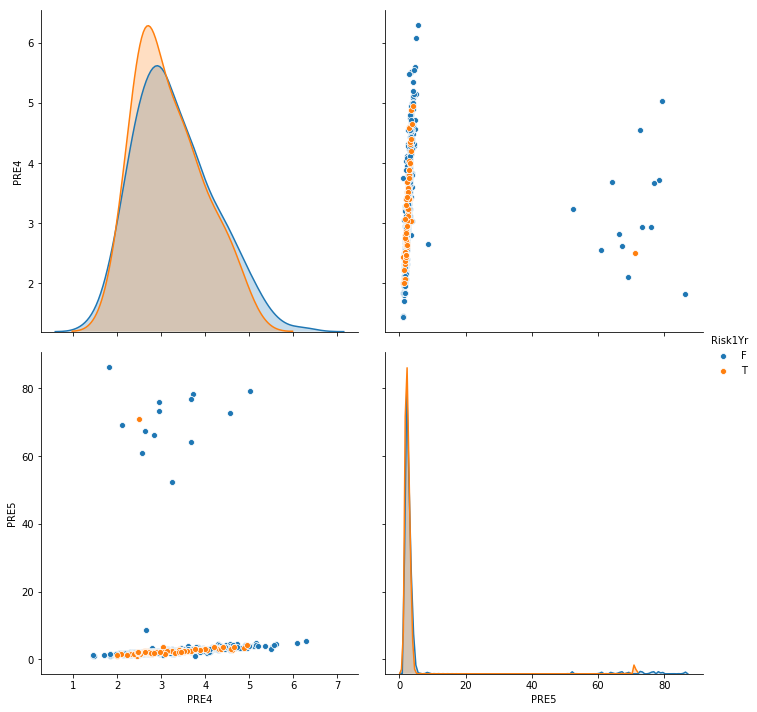

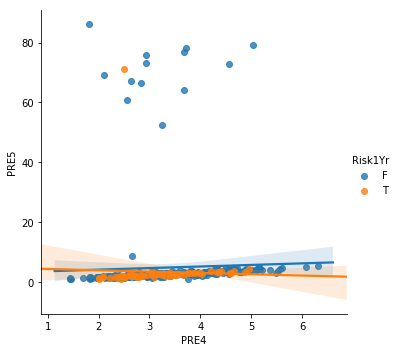

In [64]:
df_new2 = df[['PRE4','PRE5','Risk1Yr']]
sns.pairplot(df_new2,hue='Risk1Yr',size=5)
sns.lmplot('PRE4','PRE5',data=df_new2,hue='Risk1Yr')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


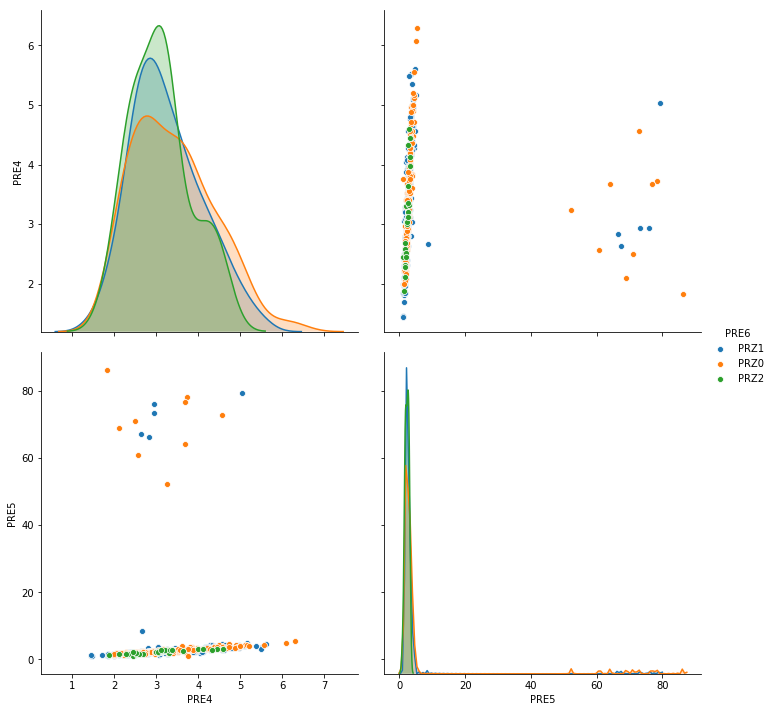

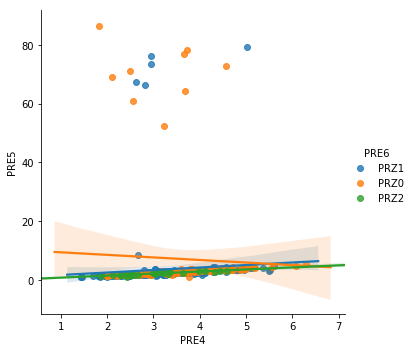

In [65]:
df_new3 = df[['PRE4','PRE5','PRE6']]
sns.pairplot(df_new3,hue='PRE6',size=5)
sns.lmplot('PRE4','PRE5',data=df_new3,hue='PRE6')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\sebas\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sebas\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\sebas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


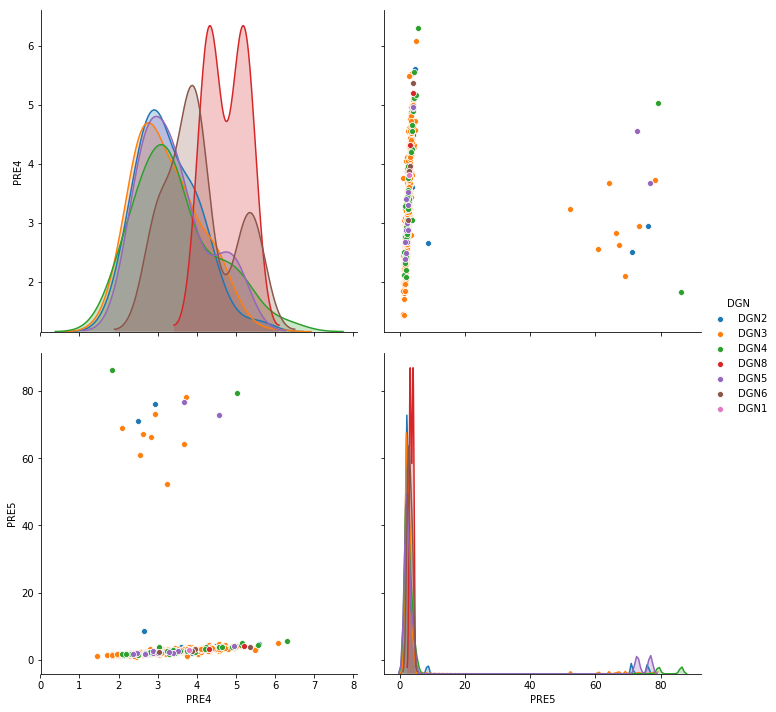

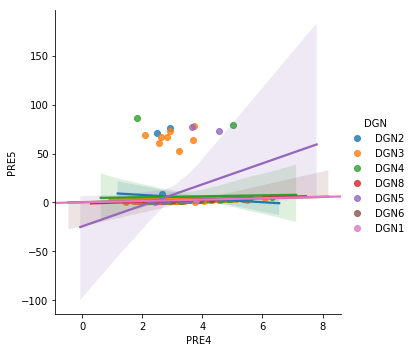

In [66]:
df_new4 = df[['PRE4','PRE5','DGN']]
sns.pairplot(df_new4,hue='DGN',size=5)
sns.lmplot('PRE4','PRE5',data=df_new4,hue='DGN')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


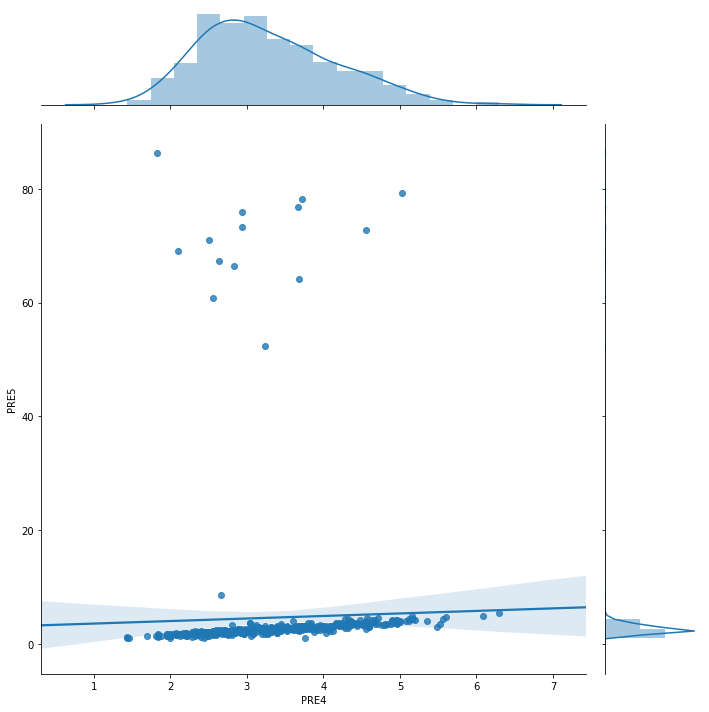

In [67]:
sns.jointplot('PRE4','PRE5',data=df,kind='reg',size=10)

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


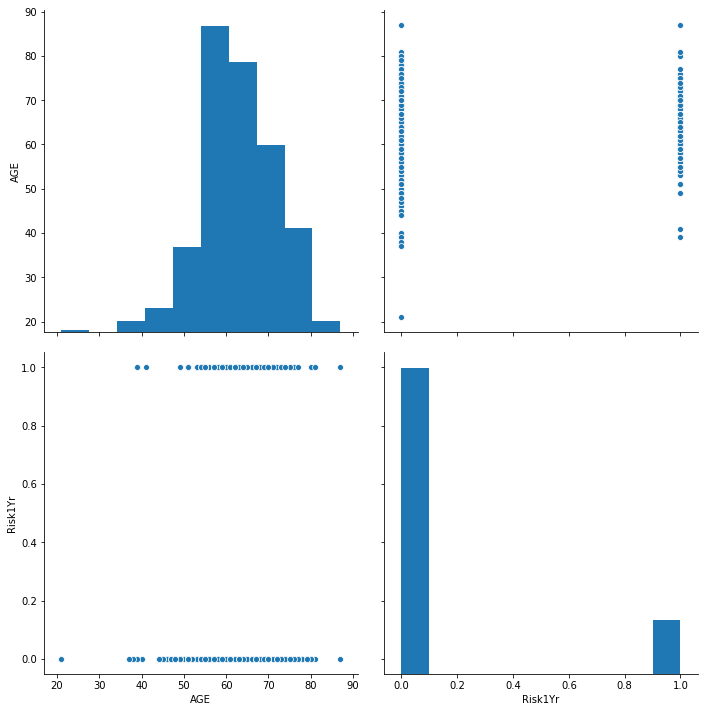

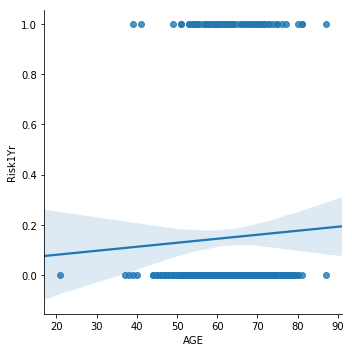

In [68]:
df_new5 = df_c[['AGE','Risk1Yr']]
sns.pairplot(df_new5,size=5)
sns.lmplot('AGE','Risk1Yr',data=df_new5)

In [74]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(final_train[df_Xcols],final_train[df_Ycols])
y_prediction = clf.predict(final_test[df_Xcols])


In [75]:
clf.score(final_train[df_Xcols],final_train[df_Ycols])

0.9857954545454546

In [76]:
y_prediction_prob = clf.predict_proba(final_test[df_Xcols])[:, 1]
[false_pos, true_pos, threshold] = roc_curve(final_test[df_Ycols], y_prediction_prob)
                                                                                                                        # MSG print results of accuracy of test v train
print(clf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Ytest_final, y_prediction))
print(clf.__class__.__name__+" log_loss is %2.3f" % log_loss(Ytest_final, y_prediction_prob))
print(clf.__class__.__name__+" auc is %2.3f" % auc(false_pos, true_pos))
print(" ")


AdaBoostClassifier accuracy is 0.763
AdaBoostClassifier log_loss is 0.688
AdaBoostClassifier auc is 0.584
 


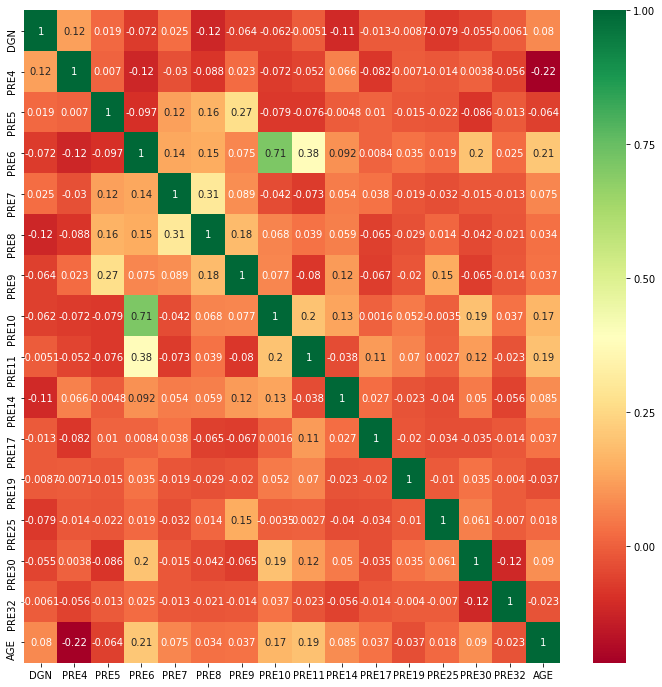

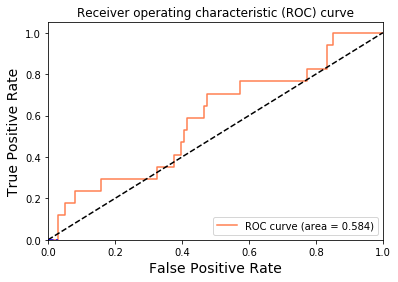

Using a threshold of 0.501 guarantees a sensitivity of 0.000 and a specificity of 0.970, i.e. a false positive rate of 2.97%.


In [77]:

Xplot = final_train[df_Xcols]

plt.subplots(figsize=(12, 12))
sns.heatmap(Xplot.corr(), annot=True, cmap="RdYlGn")
plt.show()

# ***************************************************plot ROC curce*****************************************************
plt.figure()
plt.plot(false_pos, true_pos, color='coral', label='ROC curve (area = %0.3f)' % auc(false_pos, true_pos))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,false_pos[index]], [true_pos[index],true_pos[index]], 'k--', color='blue')
plt.plot([false_pos[index],false_pos[index]], [0,true_pos[index]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % threshold[index] + "guarantees a sensitivity of %.3f " % true_pos[index] +
      "and a specificity of %.3f" % (1-false_pos[index]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(false_pos[index])*100))


In [80]:
TP = 0
FP = 0
TN = 0
FN = 0

#Ytest_final = np.array(Ytest_final)

for i in range(len(y_prediction)):
    if Ytest_final[i]==y_prediction[i]==1:
        TP += 1
    if y_prediction[i]==1 and Ytest_final[i]!=y_prediction[i]:
        FP += 1
    if Ytest_final[i]==y_prediction[i]==0:
        TN += 1
    if y_prediction[i]==0 and Ytest_final[i]!=y_prediction[i]:
        FN += 1

tot_features = (len(Chi2_head))
print("the number of significant features in the model were",tot_features)
print("the features used in the model were")


for i in range(len(Chi2_head)):

    print("number", (tot_features-i), "most significant feature", Chi2_head[i], "P value",
          P_val[i])

print(" ")
print("the performance of the model on the test data is as follows:")
print("the model gives", TP, "true positives")
print("the model gives", TN, "true negatives")
print("the model gives", FP, "type one errors")
print("the model gives", FN, "type two errors")

print("the sensitivity of the model is", TP/(len(y_prediction)))
print("the specificity of the model is", TN/(len(y_prediction)))
print("the type one error rate is", FP/(len(y_prediction)))
print("the type one error rate is", FN/(len(y_prediction)))

the number of significant features in the model were 1
the features used in the model were
number 1 most significant feature PRE5 P value 0.45565445714951913
 
the performance of the model on the test data is as follows:
the model gives 4 true positives
the model gives 86 true negatives
the model gives 15 type one errors
the model gives 13 type two errors
the sensitivity of the model is 0.03389830508474576
the specificity of the model is 0.7288135593220338
the type one error rate is 0.1271186440677966
the type one error rate is 0.11016949152542373


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, random_state=0)
clf.fit(final_train[df_Xcols],final_train[df_Ycols])
y_prediction = clf.predict(final_test[df_Xcols])

In [85]:
clf.score(final_train[df_Xcols],final_train[df_Ycols])

1.0

In [86]:
y_prediction_prob = clf.predict_proba(final_test[df_Xcols])[:, 1]
[false_pos, true_pos, threshold] = roc_curve(final_test[df_Ycols], y_prediction_prob)
                                                                                                                        # MSG print results of accuracy of test v train
print(clf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Ytest_final, y_prediction))
print(clf.__class__.__name__+" log_loss is %2.3f" % log_loss(Ytest_final, y_prediction_prob))
print(clf.__class__.__name__+" auc is %2.3f" % auc(false_pos, true_pos))
print(" ")

GradientBoostingClassifier accuracy is 0.822
GradientBoostingClassifier log_loss is 1.040
GradientBoostingClassifier auc is 0.616
 


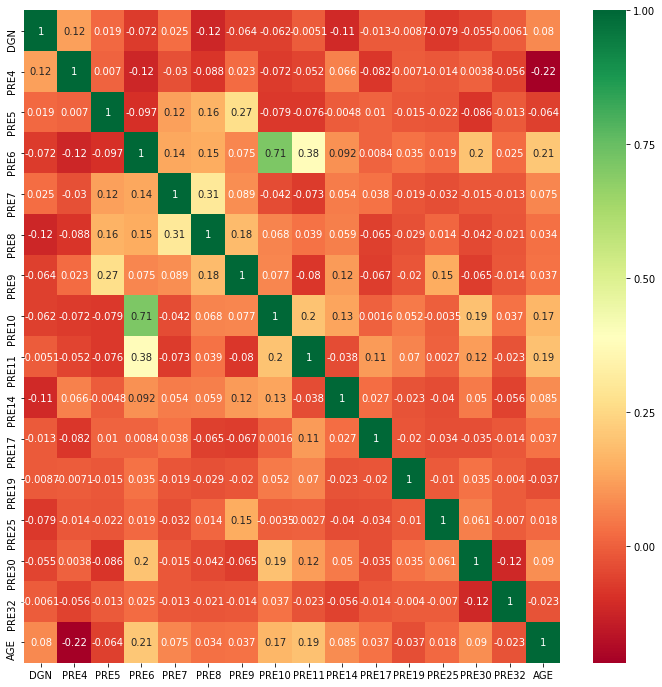

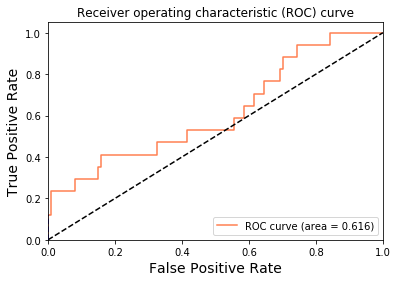

Using a threshold of 1.000 guarantees a sensitivity of 0.118 and a specificity of 1.000, i.e. a false positive rate of 0.00%.


In [87]:

Xplot = final_train[df_Xcols]

plt.subplots(figsize=(12, 12))
sns.heatmap(Xplot.corr(), annot=True, cmap="RdYlGn")
plt.show()

# ***************************************************plot ROC curce*****************************************************
plt.figure()
plt.plot(false_pos, true_pos, color='coral', label='ROC curve (area = %0.3f)' % auc(false_pos, true_pos))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,false_pos[index]], [true_pos[index],true_pos[index]], 'k--', color='blue')
plt.plot([false_pos[index],false_pos[index]], [0,true_pos[index]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % threshold[index] + "guarantees a sensitivity of %.3f " % true_pos[index] +
      "and a specificity of %.3f" % (1-false_pos[index]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(false_pos[index])*100))

In [88]:
TP = 0
FP = 0
TN = 0
FN = 0

#Ytest_final = np.array(Ytest_final)

for i in range(len(y_prediction)):
    if Ytest_final[i]==y_prediction[i]==1:
        TP += 1
    if y_prediction[i]==1 and Ytest_final[i]!=y_prediction[i]:
        FP += 1
    if Ytest_final[i]==y_prediction[i]==0:
        TN += 1
    if y_prediction[i]==0 and Ytest_final[i]!=y_prediction[i]:
        FN += 1

tot_features = (len(Chi2_head))
print("the number of significant features in the model were",tot_features)
print("the features used in the model were")


for i in range(len(Chi2_head)):

    print("number", (tot_features-i), "most significant feature", Chi2_head[i], "P value",
          P_val[i])

print(" ")
print("the performance of the model on the test data is as follows:")
print("the model gives", TP, "true positives")
print("the model gives", TN, "true negatives")
print("the model gives", FP, "type one errors")
print("the model gives", FN, "type two errors")

print("the sensitivity of the model is", TP/(len(y_prediction)))
print("the specificity of the model is", TN/(len(y_prediction)))
print("the type one error rate is", FP/(len(y_prediction)))
print("the type one error rate is", FN/(len(y_prediction)))

the number of significant features in the model were 1
the features used in the model were
number 1 most significant feature PRE5 P value 0.45565445714951913
 
the performance of the model on the test data is as follows:
the model gives 4 true positives
the model gives 93 true negatives
the model gives 8 type one errors
the model gives 13 type two errors
the sensitivity of the model is 0.03389830508474576
the specificity of the model is 0.788135593220339
the type one error rate is 0.06779661016949153
the type one error rate is 0.11016949152542373
